<a href="https://colab.research.google.com/github/Githubuser2525/Npower-JDA-T5-7/blob/main/U_S_Pollution_Data_Analysis_2000_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  US pollution Data Analysis


---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fo
import plotly.express as px
from geopy.geocoders import Nominatim


Preparing data and removing unnecessary

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
import zipfile
import io

zf = zipfile.ZipFile(io.BytesIO(uploaded['archive.zip']), "r")
zf.extractall()

In [ ]:
df = pd.read_csv('pollution_2000_2022.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace= True)


In [ ]:
df.head()

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


Extracting the necessary data on to a seperate data set

In [ ]:
air_quality_df = df[['Date','State','O3 AQI','CO AQI']]

In [ ]:
air_quality_df.head()

,Date,State,O3 AQI,CO AQI
0,2000-01-01,Arizona,37,25.0
1,2000-01-02,Arizona,30,26.0
2,2000-01-03,Arizona,15,28.0
3,2000-01-04,Arizona,31,34.0
4,2000-01-05,Arizona,11,42.0


*Extracting values for 2000-01-01 and plot using Bar plot.*




In [ ]:
aqi_2000_df = air_quality_df[air_quality_df['Date']=='2000-01-01']

In [ ]:
aqi_2000_df.head()

,Date,State,O3 AQI,CO AQI
0,2000-01-01,Arizona,37,25.0
348,2000-01-01,Arizona,36,15.0
533,2000-01-01,Arizona,36,8.0
880,2000-01-01,California,27,9.0
1243,2000-01-01,California,20,8.0


In [ ]:
aqi_avg = aqi_2000_df.groupby('State',as_index=False).mean()

<ipython-input-13-4f907fc95d5c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aqi_avg = aqi_2000_df.groupby('State',as_index=False).mean()


In [ ]:
aqi_avg.head()

,State,O3 AQI,CO AQI
0,Arizona,36.333333,16.000000
1,California,28.428571,12.380952
2,Colorado,25.000000,14.000000
3,District Of Columbia,13.000000,41.000000
4,Florida,44.000000,18.000000


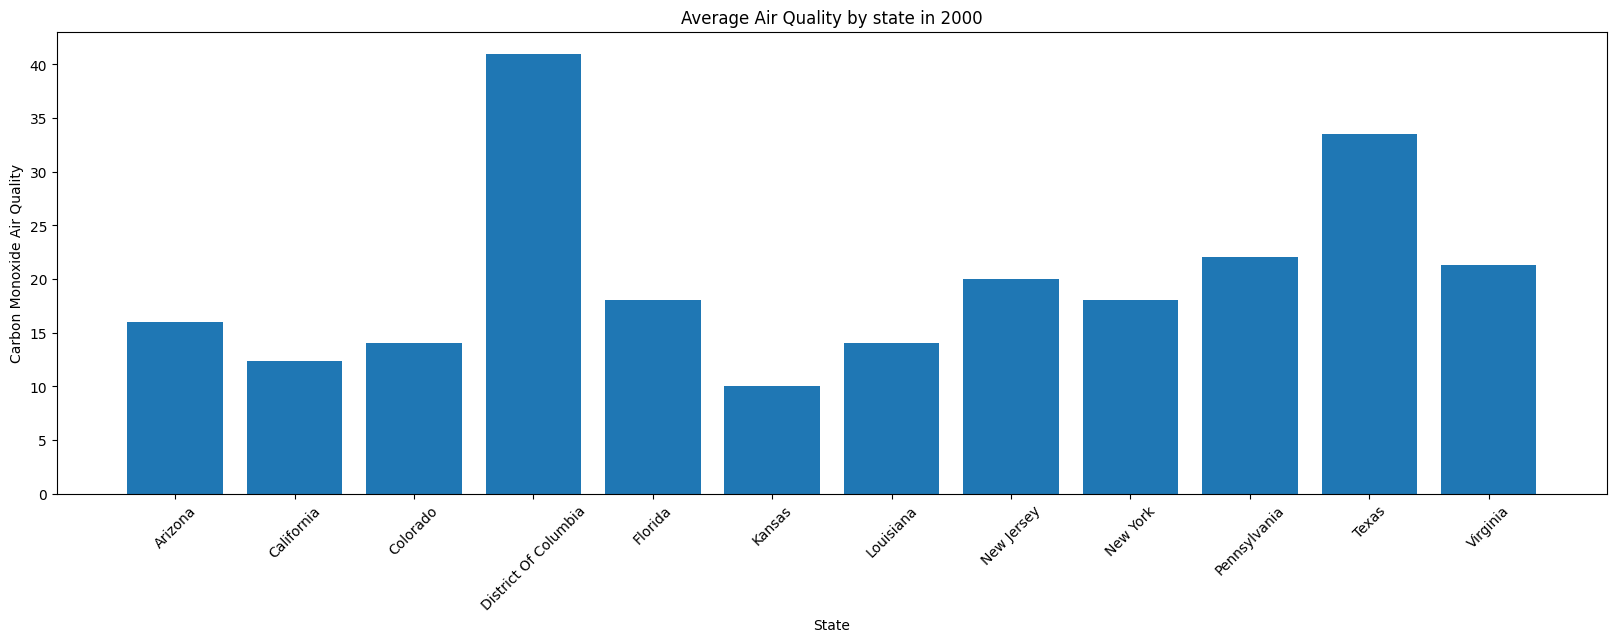

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(aqi_avg['State'], aqi_avg['CO AQI'])
plt.xlabel("State")
plt.ylabel("Carbon Monoxide Air Quality")
plt.title("Average Air Quality by state in 2000")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

*District of Columbia has the worst air quality, while Kensas has the best air quality among the chosen states for the year 2000.The bar plot compares the air quality of the chosen states.*

In [ ]:
air_quality_df.tail()

,Date,State,O3 AQI,CO AQI
647246,2022-06-26,Wyoming,39,0.0
647247,2022-06-27,Wyoming,47,0.0
647248,2022-06-28,Wyoming,54,1.0
647249,2022-06-29,Wyoming,44,1.0
647250,2022-06-30,Wyoming,45,0.0


In [ ]:
#Visualization using plotly
aqi_2004_df = air_quality_df[air_quality_df['Date']=='2004-01-01']
aqi_2004_df.head()

,Date,State,O3 AQI,CO AQI
93762,2004-01-01,Arizona,23,18.0
94090,2004-01-01,Arizona,29,11.0
94287,2004-01-01,Arizona,33,7.0
94653,2004-01-01,California,30,7.0
95002,2004-01-01,California,21,3.0


In [ ]:
aqi_2004_avg = aqi_2004_df.groupby('State',as_index=False).mean()

<ipython-input-18-3851e29be99f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aqi_2004_avg = aqi_2004_df.groupby('State',as_index=False).mean()


In [ ]:
aqi_2004_avg.head()

,State,O3 AQI,CO AQI
0,Arizona,28.333333,12.00000
1,California,28.260870,16.26087
2,Colorado,23.000000,8.00000
3,District Of Columbia,16.000000,20.00000
4,Florida,38.000000,8.00000


Visualizing Air pollution for 2004

In [ ]:
fig_04 = px.bar(aqi_2004_avg,x= 'State',y = 'CO AQI',title = 'Average Air Quality by state in 2004')
fig_04.update_layout(xaxis_title = 'State',yaxis_title = 'CO AQI')
fig_04.show()

*District of Columbia still has the worst air quality though the air quality seemed to become better, while Pennsylvennia's air quality has decreased*




# Visualizing Air pollution geographically for 2022-01-01 in the United Sates

In [ ]:
aqi_2022_df = df[df['Date']=='2022-01-01']
aqi_2022_df['CO AQI']

620688    1.0
620861    1.0
621085    5.0
621292    3.0
621510    3.0
         ... 
645709    7.0
645889    5.0
646622    2.0
646926    1.0
647107    2.0
Name: CO AQI, Length: 120, dtype: float64

In [ ]:
# Getting state location coordinates using GeoPy
aqi_2022_df = df[df['Date']=='2022-01-01']
aqi_2022_df = aqi_2022_df.groupby('State',as_index=False).mean()
geolocator = Nominatim(user_agent="my_geocoder")

def geocode_state(state):
    location = geolocator.geocode(state, timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

aqi_2022_df[['Latitude', 'Longitude']] = aqi_2022_df['State'].apply(lambda state: pd.Series(geocode_state(state)))


<ipython-input-25-19d0a0a4febe>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
aqi_2022_coor_df = aqi_2022_df[['State','O3 AQI','CO AQI', 'Latitude', 'Longitude']]
aqi_2022_coor_df.head()

,State,O3 AQI,CO AQI,Latitude,Longitude
0,Alabama,24.00000,1.000000,33.258882,-86.829534
1,Arizona,38.80000,3.000000,34.395342,-111.763275
2,California,31.37037,6.388889,36.701463,-118.755997
3,Colorado,32.00000,3.250000,38.725178,-105.607716
4,Connecticut,23.00000,3.000000,41.650020,-72.734216


In [ ]:
# Checking for Null vanlues in aqi_2022_coor_df
from numpy import NaN
nan_values_longitude = aqi_2022_coor_df[pd.isna(aqi_2022_coor_df['Longitude'])]
nan_values_latitude = aqi_2022_coor_df[pd.isna(aqi_2022_coor_df['Latitude'])]
pd.concat([nan_values_longitude, nan_values_latitude])

,State,O3 AQI,CO AQI,Latitude,Longitude


In [ ]:
# Visualizing Choropleth Map for the data
m = fo.Map(location =[38, -97], zoom_start=5)

choropleth = fo.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=aqi_2022_coor_df,
    columns=['State', 'CO AQI'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='CO AQI'
).add_to(m)

# Add layer control
fo.LayerControl().add_to(m)
m

*We can visualize the air quality for states in US with the locations. East coast has the low air quality probably due to bigger and denser cities. West coast has better air quality with the exception of California. The dark colored states are the ones we didn't have any information.*